## Data description

__crim__ = per capita crime rate by town.

__zn__ = proportion of residential land zoned for lots over 25,000 sq.ft.

__indus__ = proportion of non-retail business acres per town.

__chas__ = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

__nox__ = nitrogen oxides concentration (parts per 10 million).

__rm__ = average number of rooms per dwelling.

__age__ = proportion of owner-occupied units built prior to 1940.

__dis__ = weighted mean of distances to five Boston employment centres.

__rad__ = index of accessibility to radial highways.

__tax__ = full-value property-tax rate per USD 10000.

__ptratio__ = pupil-teacher ratio by town.

__black__ = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

__lstat__ = lower status of the population (percent).

__medv__ = median value of owner-occupied homes in USD1000s.

## Import libraries and data

In [1]:
import pandas as pd

In [15]:
df = pd.read_csv('homework.csv', index_col=0)

In [16]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [17]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


## Preprocessing

In [18]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
np_scaled = min_max_scaler.fit_transform(df)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = df.columns
df_norm.head()

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.180,0.058148,0.0,0.314815,0.583656,0.629787,0.308996,0.000000,0.206501,0.313953,1.000000,0.089680,0.422222
1,0.000285,0.000,0.234444,0.0,0.172840,0.553834,0.775532,0.400545,0.043478,0.103250,0.604651,1.000000,0.204470,0.368889
2,0.000354,0.000,0.053333,0.0,0.150206,0.665569,0.423404,0.514848,0.086957,0.065010,0.709302,0.994230,0.033389,0.631111
3,0.000853,0.000,0.053333,0.0,0.150206,0.694423,0.512766,0.514848,0.086957,0.065010,0.709302,1.000000,0.099338,0.693333
4,0.001115,0.125,0.264074,0.0,0.286008,0.474632,0.644681,0.462482,0.173913,0.235182,0.302326,0.996695,0.295254,0.397778


In [26]:
cols_cat = ['chas']
print('categorical features: ', cols_cat)
cols_con = list(set(df_norm.columns) - set(cols_cat))
print('continuous features: ', cols_con)

categorical features:  ['chas']
continuous features:  ['zn', 'indus', 'tax', 'lstat', 'age', 'ptratio', 'rad', 'crim', 'nox', 'medv', 'dis', 'black', 'rm']


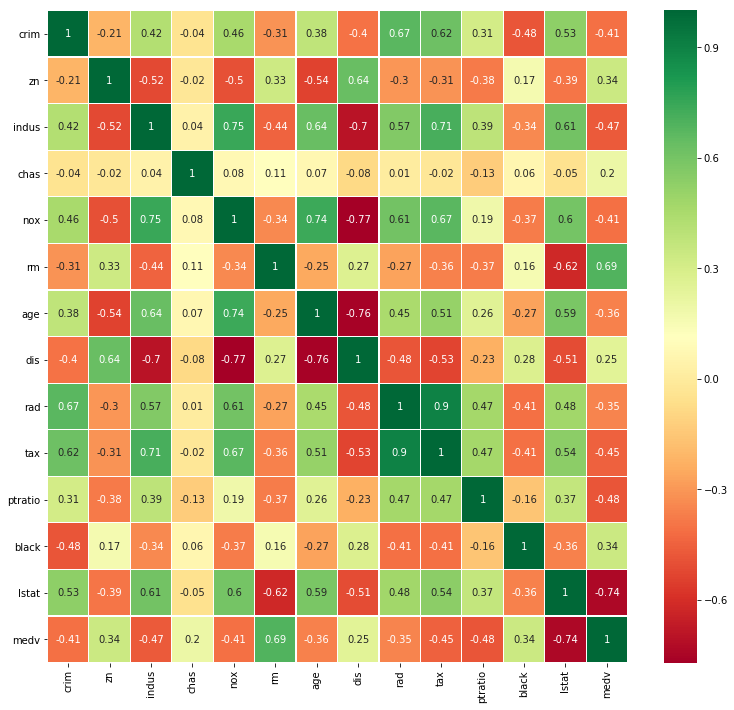

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_norm.corr(method ='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(13,12)
plt.show()

## Linear regression

In [32]:
y_col = ['medv']
X_cols = list(set(df_norm.columns) - set(y_col))
y = df_norm[y_col]
X = df_norm[X_cols]
print('y: ', y_col, y.shape)
print('X: ', X_cols, X.shape)

y:  ['medv'] (333, 1)
X:  ['zn', 'indus', 'tax', 'lstat', 'age', 'ptratio', 'rad', 'crim', 'nox', 'dis', 'chas', 'black', 'rm'] (333, 13)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=2019
)
print('y_train: ', y_train.shape, ' | y_test: ', y_test.shape)
print('X_train: ', X_train.shape, ' | X_test: ', X_test.shape)

y_train:  (266, 1)  | y_test:  (67, 1)
X_train:  (266, 13)  | X_test:  (67, 13)


In [47]:
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression(normalize=False).fit(X_train, y_train)
for col, coeff in zip(X_cols, lin_regr.coef_[0]):
    print(col, ': ', coeff )
print('intercept: ', lin_regr.intercept_)

zn :  0.12393091564529232
indus :  0.061481606850724735
tax :  -0.17250498317736665
lstat :  -0.5637093431786423
age :  0.014408376585149752
ptratio :  -0.1451314863919563
rad :  0.17247926982560757
crim :  -0.06821776748526316
nox :  -0.14708927007571448
dis :  -0.2952322771444716
chas :  0.10741913928535106
black :  0.09497574438217542
rm :  0.40040228218544754
intercept:  [0.45233532]


In [48]:
y_pred = lin_regr.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('linear regression | mean squared error: ', mean_squared_error(y_test, y_pred))
print('linear regression | mean r2 score: ', r2_score(y_test, y_pred))  
print('linear regression | mean absolute error: ', mean_absolute_error(y_test, y_pred))

linear regression | mean squared error:  0.014405051011183065
linear regression | mean r2 score:  0.641904321202593
linear regression | mean absolute error:  0.08050938546416046


## Decision tree regressor

In [75]:
from sklearn.tree import DecisionTreeRegressor
tree_regr = DecisionTreeRegressor(max_depth=7, random_state=2019).fit(X_train, y_train)

In [76]:
y_pred_tree = tree_regr.predict(X_test)

In [77]:
print('tree regressor | mean squared error: ', mean_squared_error(y_test, y_pred_tree))
print('tree regressor | mean r2 score: ', r2_score(y_test, y_pred_tree))  
print('tree regressor | mean absolute error: ', mean_absolute_error(y_test, y_pred_tree))

tree regressor | mean squared error:  0.009080838465233217
tree regressor | mean r2 score:  0.7742591114927106
tree regressor | mean absolute error:  0.06574120040434575
